In [ ]:
# Import Packages and Mount Google Drive

import skimage.feature
import skimage.filters
import skimage.measure
import skimage.transform
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import torch
from google.colab import drive
from google.colab import auth
from google.auth import default
import os
import numpy as np
drive.mount('/content/drive/', force_remount=True)
os.chdir('/content/drive/MyDrive/YRD2')

Mounted at /content/drive/


In [ ]:
def config_plot():
    '''
    Function to remove axis tickers and box around figure
    '''

    plt.box(False)
    plt.axis('off')

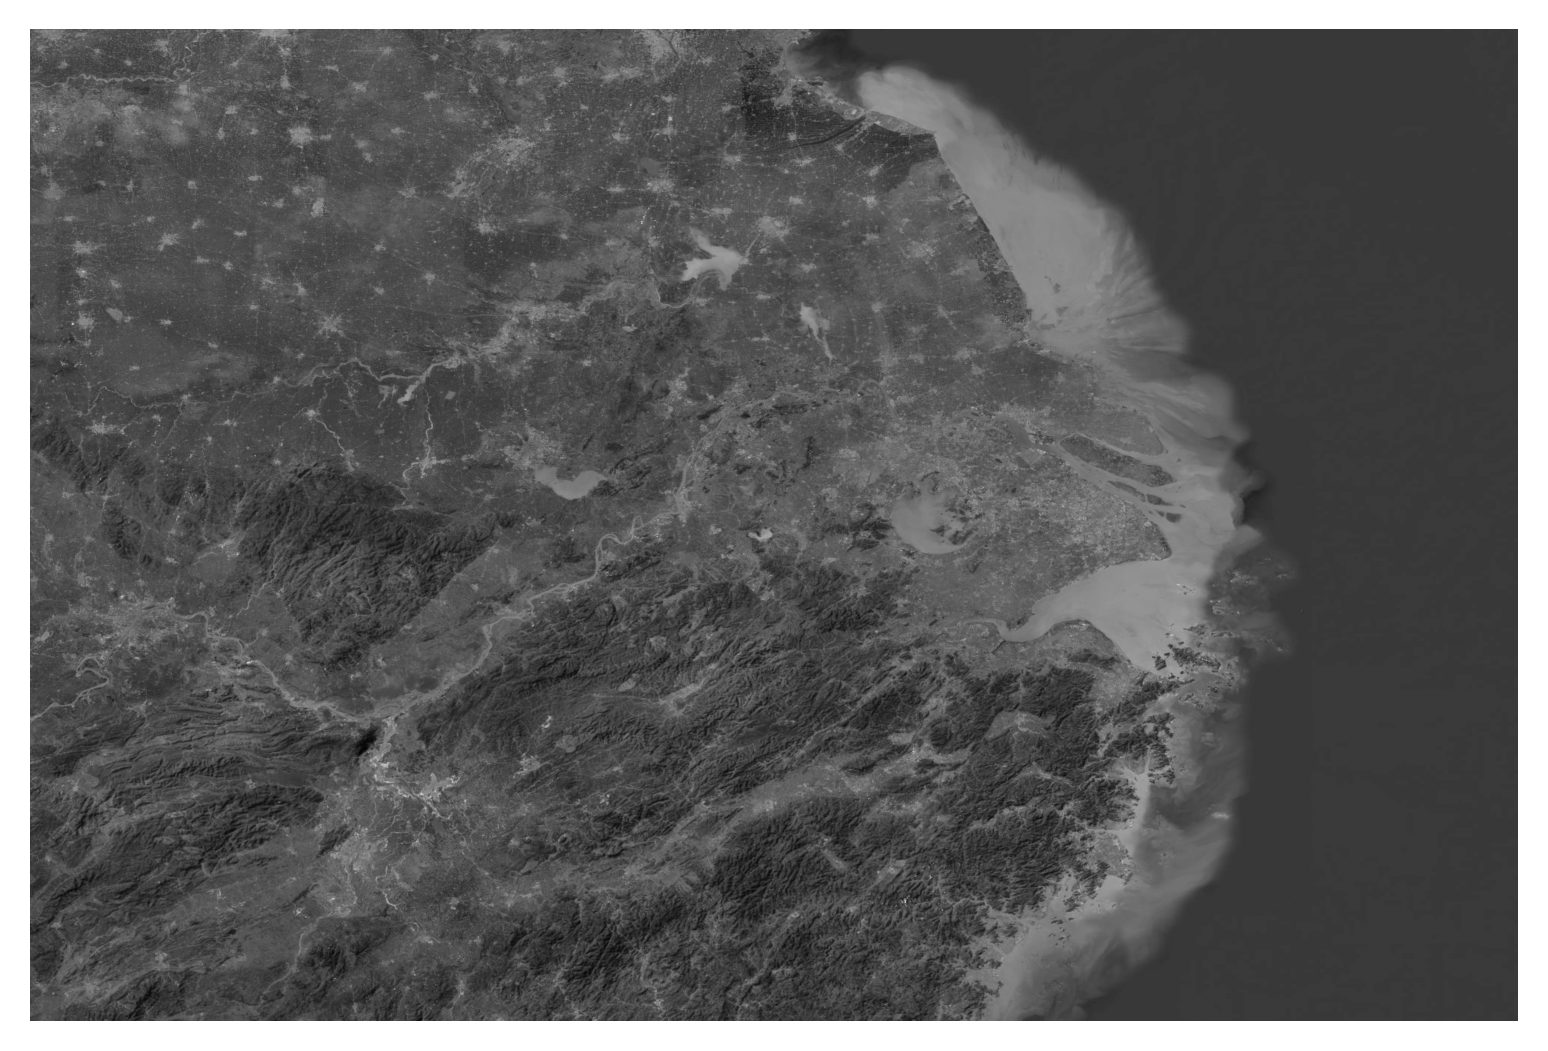

In [ ]:
# Load Basemap using open function from Image package
basemap = Image.open('Basemap.jpg')

# Convert into numpy array

basemap = np.asarray(basemap)

height, width = basemap.shape

# Perform crop by reducing height by 50 pixels

basemap = basemap[0:height-50,0:width]

# Save Cropped Image
data_dirpath = os.chdir('/content/drive/MyDrive/YRD2/Saved_Images')

basemap = Image.fromarray(basemap)
basemap.save('basemap.png')

# Create visualization
fig = plt.figure(dpi=300)

ax = fig.add_subplot(1, 1, 1)
ax.imshow(basemap, cmap='gray')
config_plot()

In [ ]:
# Import 2018 Images (Provinces, Urban_2018, Rice_2018, XCH4_2018) and perform -50pixel croppings to match basemap

data_dirpath = os.chdir('/content/drive/MyDrive/YRD2')
YRD_Colored = Image.open('Provinces_Colored.jpg')
Urban_2018 = Image.open('Urban_2018.jpg')
Rice_2018 = Image.open('Rice_2018.jpg')
XCH4_2018 = Image.open('XCH4_2018.jpg')

# Convert all images into Numpy Arrays (YRD_Colored is 3-channel)

YRD_Colored = np.asarray(YRD_Colored)
height, width, _ = YRD_Colored.shape

Urban_2018 = np.asarray(Urban_2018)
height, width = Urban_2018.shape

Rice_2018 = np.asarray(Rice_2018)
height, width = Rice_2018.shape

XCH4_2018 = np.asarray(XCH4_2018)
height, width = XCH4_2018.shape

# Perform cropping on all images by reducing height by 50 pixels (line up with Basemap)

YRD_Colored = YRD_Colored[0:height-50,0:width]
Urban_2018 = Urban_2018[0:height-50,0:width]
Rice_2018 = Rice_2018[0:height-50,0:width]
XCH4_2018 = XCH4_2018[0:height-50,0:width]

# Save Cropped Images to Google Drive

cropped_images = 0

data_dirpath = os.chdir('/content/drive/MyDrive/YRD2/Saved_Images')

YRD_Colored_crop_image = Image.fromarray(YRD_Colored)
YRD_Colored_crop_image.save('YRD_Colored.png')

urban_2018_crop_image = Image.fromarray(Urban_2018)
urban_2018_crop_image.save('Urban_2018.png')

rice_2018_crop_image = Image.fromarray(Rice_2018)
rice_2018_crop_image.save('Rice_2018.png')

xch4_2018_crop_image = Image.fromarray(XCH4_2018)
xch4_2018_crop_image.save('XCH4_2018.png')

In [ ]:
# Reshape Provincial Image (YRD_Colored) into 2D Array of pixels with 3 Color Values (RGB)
pixel_values = YRD_Colored.reshape((-1, 3))

# Convert to Float32
pixel_values = np.float32(pixel_values)

In [ ]:
print(pixel_values)

[[240. 240. 240.]
 [240. 240. 240.]
 [240. 240. 240.]
 ...
 [240. 240. 240.]
 [240. 240. 240.]
 [240. 240. 240.]]


In [ ]:
# Print total number of pixels

print(pixel_values.shape)

(23597700, 3)


In [ ]:
np.unique(pixel_values, axis=0)

array([[179., 236., 255.],
       [180., 233., 255.],
       [180., 235., 255.],
       ...,
       [255., 234., 233.],
       [255., 235., 234.],
       [255., 235., 236.]], dtype=float32)

In [ ]:
# Label Process (creating labels from Provinces "YRD_Colored")

# Define Stopping Criteria ()

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [ ]:
# Perform K-Means Cluster (# of Clusters = K)

k = 5
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [ ]:
# Convert K-Means Clusters (centers) back into 8-bit values

centers = np.uint8(centers)

# Flatten the Labels Array

labels = labels.flatten()

In [ ]:
# Reshape the labels (total pixel count of YRD_Colored is 23597700) to HxW of (3966, 5950) to match other images

labels = np.reshape(labels, (3966, 5950))

# Print shape of labels to ensure process was successful

labels.shape

(3966, 5950)

In [ ]:
print(labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Print the Centers to see what colors (provinces) belong to the Centers

print(centers)

[[254 254 254]
 [221 249 192]
 [191 236 255]
 [253 190 190]
 [215 217 254]]


[254, 254, 254] = Basemap

[221, 249, 192] = Jiangsu

[191, 236, 255] = Anhui

[253, 190, 190] = Shanghai

[215, 217, 254] = Zhejiang

In [ ]:
centers = np.asarray(centers)

In [ ]:
# Create a new array that's the same size as YRD Colored but all values are zeros

YRD_Segment = np.zeros_like(YRD_Colored)

In [ ]:
# Create a segment and fill with labels

for i in range(5):
  Idx = np.where(labels == i)
  YRD_Segment[Idx[0], Idx[1]] = centers[i]

In [ ]:
np.unique(YRD_Segment.reshape(-1, 3), axis=0)

array([[191, 236, 255],
       [215, 217, 254],
       [221, 249, 192],
       [253, 190, 190],
       [254, 254, 254]], dtype=uint8)

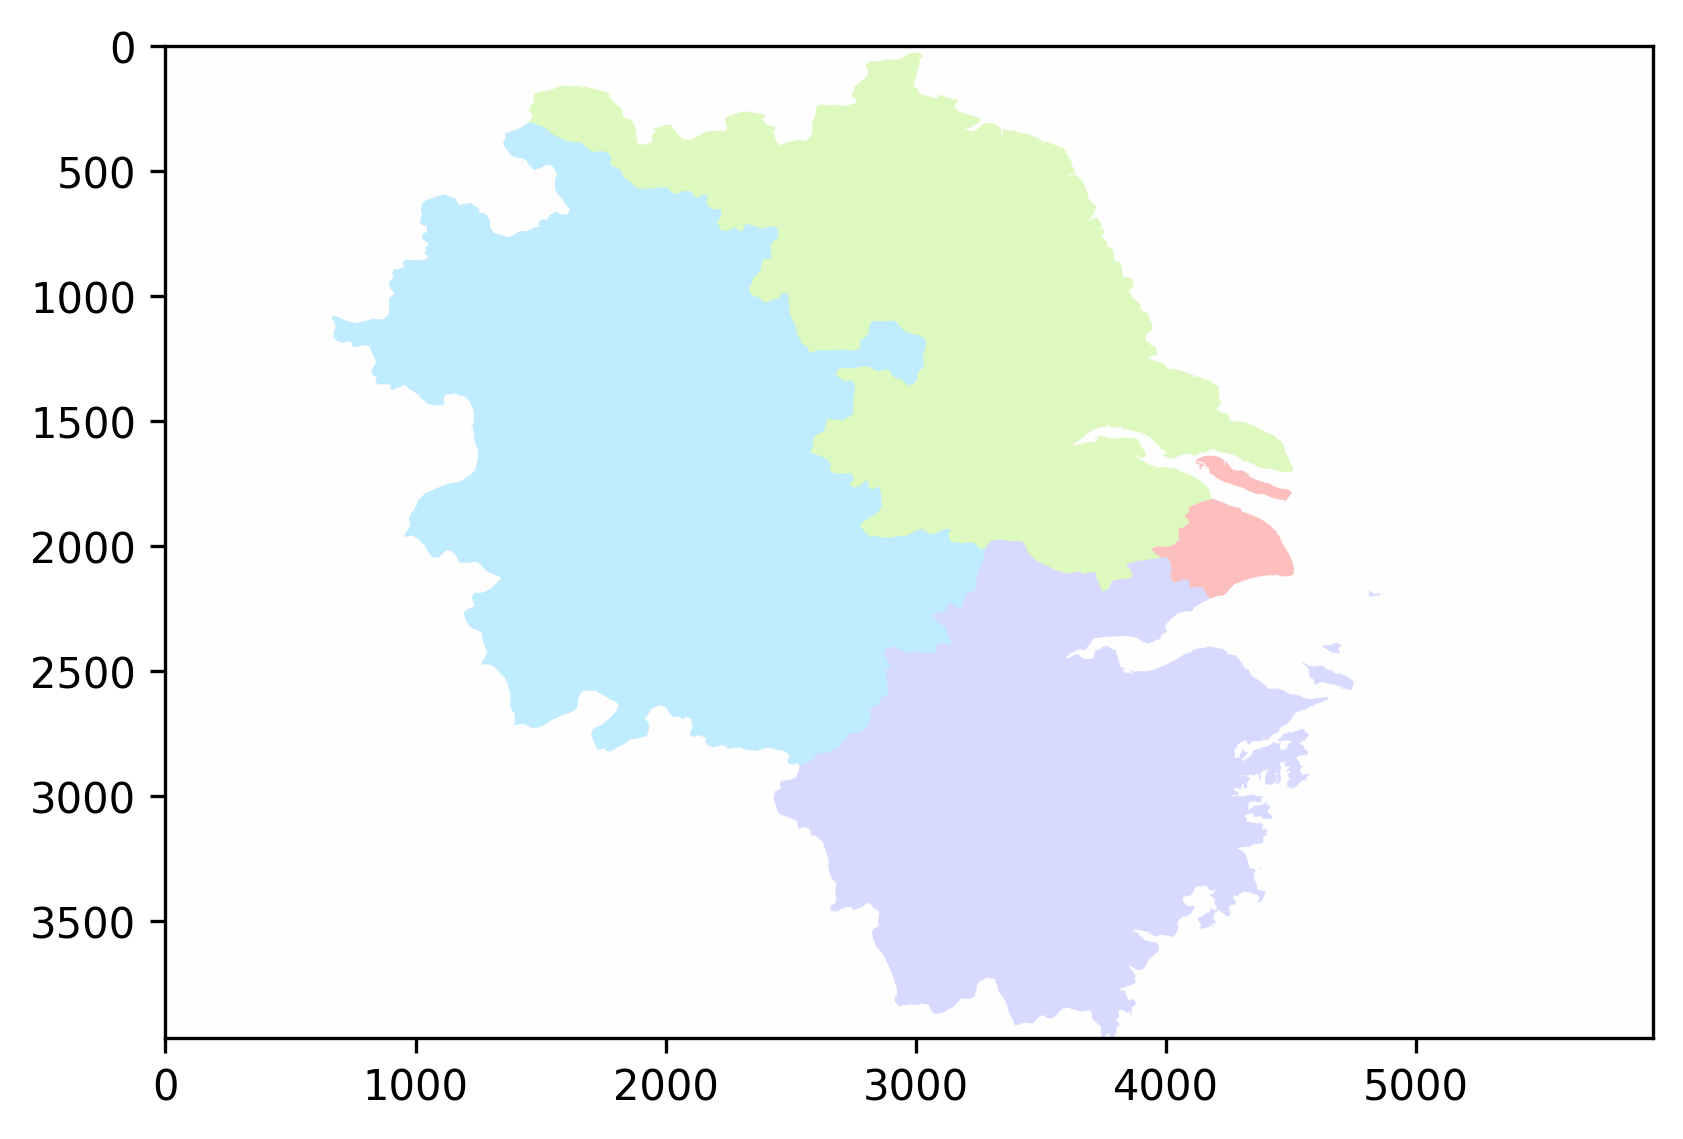

In [ ]:
# Create visualization
fig = plt.figure(dpi=300)

ax = fig.add_subplot(1, 1, 1)
ax.imshow(YRD_Segment)
#config_plot()

In [ ]:
# Shanghai dimensions:
# HEIGHT = 1500 to 2500
# WIDTH =  3500 - 4500

In [ ]:
# Generate Crop Size (256x256) and Perform Random Number of Tests (10)

x = np.random.rand(10)
y = np.random.rand(10)

# Create Crop with HxW (256x256)

crop_width = 256
crop_height = 256

# Generate X,Y Coordinates that will return 10 Random Coordinates that fall within Croppings

New_X_Coords = np.floor((labels.shape[1] - crop_width) * x).astype(np.int32)
New_Y_Coords = np.floor((labels.shape[0] - crop_height) * y).astype(np.int32)

print(New_X_Coords)
print(New_Y_Coords)

[2233 5196 3332 3284 1491 5407 2122 2470 5088 2645]
[ 552 1766 3457  695 3428 3377 1943 1536 3059 1682]


In [ ]:
# Crop starts at x coord (blank point) and ends at width of crop (from y to height of crop)

crop_x_start = New_X_Coords[0]
crop_y_start = New_Y_Coords[0]

crop_x_end = crop_x_start + crop_width
crop_y_end = crop_y_start + crop_height

# Now that we have start and end, select region that falls within boundaries

crop = labels[crop_y_start:crop_y_end, crop_x_start:crop_x_end]

print(crop)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]]


In [ ]:
# Print Number of Unique Values for Crops (Should return 5: Basemap, Provinces, Urban, Rice, XCH4)

print(np.unique(crop))

[1 2]


In [ ]:
# Verify that there are also 5 for Labels (Basemap, Provinces, Urban, Rice, XCH4)

print(np.unique(labels))


[0 1 2 3 4]


In [ ]:
# Convert all Images to Numpy Arrays to prep for Training/Testing Set Creation (don't care about Basemap)

# labels = np.asarray(labels)
Urban_2018 = np.asarray(Urban_2018)
Rice_2018 = np.asarray(Rice_2018)
XCH4_2018 = np.asarray(XCH4_2018)
basemap = np.asarray(basemap)
provinces = np.asarray(YRD_Segment)

In [ ]:
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
# Import additional packages (random) to being random testing/training crop selection

import random
np.random.seed(1)
random.seed(1)

In [ ]:
import os

parent_dir = '/content/drive/MyDrive/YRD2/Saved_Images/Training_xx'
contents = os.listdir(parent_dir)
print(contents)


['provinces', 'basemap', 'urban', 'rice', 'xch4']


Building Training Set (Anhui, Shanghai, Zhejiang):

In [ ]:
import os
import shutil

# Set the Number of Training Samples (cropped images) to 5000
n_samples_train = 5000

# Set the crop size
crop_height = 256
crop_width = 256

# Set the output directory path
data_dirpath = '/content/drive/MyDrive/YRD2/Saved_Images/Training_xx'


# Define the populate_missing_files function
def populate_missing_files(directory_path, target_length):
    current_length = len(os.listdir(directory_path))

    if current_length < target_length:
        files = os.listdir(directory_path)
        latest_file = max(files, key=lambda f: os.path.getctime(os.path.join(directory_path, f)))

        for i in range(current_length, target_length):
            new_file = os.path.join(directory_path, f"{i}.png")
            shutil.copy(os.path.join(directory_path, latest_file), new_file)

# Clear existing crops
if os.path.exists(data_dirpath):
    shutil.rmtree(data_dirpath)
os.makedirs(data_dirpath)
os.makedirs(os.path.join(data_dirpath, "provinces"))
os.makedirs(os.path.join(data_dirpath, "basemap"))
os.makedirs(os.path.join(data_dirpath, "urban"))
os.makedirs(os.path.join(data_dirpath, "rice"))
os.makedirs(os.path.join(data_dirpath, "xch4"))

# Anhui, Zhejiang, and Shanghai labels
target_labels = [[191, 236, 255], [215, 217, 254], [253, 190, 190]]

# Initialize counters for each variable
provinces_count = 0
basemap_count = 0
urban_count = 0
rice_count = 0
xch4_count = 0

while True:
    crop_y = np.random.randint(low=0, high=YRD_Segment.shape[0] - crop_height)
    crop_x = np.random.randint(low=0, high=YRD_Segment.shape[1] - crop_width)

    basemap_crop = basemap[crop_y:crop_y + crop_height, crop_x:crop_x + crop_width]
    YRD_crop = YRD_Segment[crop_y:crop_y + crop_height, crop_x:crop_x + crop_width]
    urban_crop = Urban_2018[crop_y:crop_y + crop_height, crop_x:crop_x + crop_width]
    rice_crop = Rice_2018[crop_y:crop_y + crop_height, crop_x:crop_x + crop_width]
    xch4_crop = XCH4_2018[crop_y:crop_y + crop_height, crop_x:crop_x + crop_width]

    unique_labels = YRD_crop.reshape(-1, 3)

    if not any((unique_labels == target_label).all(1).any() for target_label in target_labels):
        continue

    # verify the crop does not include Jiangsu (testing set):
    jiangsu_label = [221, 249, 192]
    if (unique_labels == jiangsu_label).all(1).any():
      continue

    file_name = "{:08d}.png".format(provinces_count)

    YRD_crop_image = Image.fromarray(YRD_crop)
    YRD_crop_image.save(os.path.join(data_dirpath, "provinces", file_name))

    basemap_crop_image = Image.fromarray(basemap_crop)
    basemap_crop_image.save(os.path.join(data_dirpath, "basemap", file_name))

    urban_crop_image = Image.fromarray(urban_crop)
    urban_crop_image.save(os.path.join(data_dirpath, "urban", file_name))

    rice_crop_image = Image.fromarray(rice_crop)
    rice_crop_image.save(os.path.join(data_dirpath, "rice", file_name))

    xch4_crop_image = Image.fromarray(xch4_crop)
    xch4_crop_image.save(os.path.join(data_dirpath, "xch4", file_name))

    provinces_count += 1
    basemap_count += 1
    urban_count += 1
    rice_count += 1
    xch4_count += 1

    if (
        provinces_count >= n_samples_train
        and basemap_count >= n_samples_train
        and urban_count >= n_samples_train
        and rice_count >= n_samples_train
        and xch4_count >= n_samples_train
    ):
        break

# Check and populate missing files
target_length = 5000
folder_names = ["basemap", "urban", "rice", "xch4", "provinces"]

for folder_name in folder_names:
    folder_path = os.path.join(data_dirpath, folder_name)
    populate_missing_files(folder_path, target_length)

# Verify the count of files in the training set
# check_data_generation()

# Check the count of files in each folder
for folder_name in folder_names:
    folder_path = os.path.join(data_dirpath, folder_name)
    file_count = len(os.listdir(folder_path))
    print(f"Number of files in {folder_name}: {file_count}")


Number of files in basemap: 5000
Number of files in urban: 5000
Number of files in rice: 5000
Number of files in xch4: 5000
Number of files in provinces: 5000


Build Testing Set (Jiangsu):

In [ ]:
import os
import shutil

# Set the Number of Testing Samples (cropped images) to 1000
n_samples_test = 1000

n_height_test = 256
n_width_test = 256

crop_idx = 0

# HxW of Testing Crops = (256x256)

data_dirpath = '/content/drive/MyDrive/YRD2/Saved_Images/Testing_xx'

# Define the populate_missing_files function
def populate_missing_files(folder_path, target_length):
    files = os.listdir(folder_path)
    existing_count = len(files)
    if existing_count < target_length:
        for i in range(existing_count, target_length):
            file_name = f"{i:08d}.png"
            file_path = os.path.join(folder_path, file_name)
            # Create a placeholder image and save it
            placeholder_image = Image.fromarray(np.zeros((10, 10), dtype=np.uint8))
            placeholder_image.save(file_path)
        print(f"Populated missing files in {folder_path}")

# Clear existing crops
if os.path.exists(data_dirpath):
    shutil.rmtree(data_dirpath)
os.makedirs(data_dirpath)
os.makedirs(os.path.join(data_dirpath, "provinces"))
os.makedirs(os.path.join(data_dirpath, "basemap"))
os.makedirs(os.path.join(data_dirpath, "urban"))
os.makedirs(os.path.join(data_dirpath, "rice"))
os.makedirs(os.path.join(data_dirpath, "xch4"))

# Set Testing Set (Jiangsu) - Basemap = 0 (background)
target_label = [221, 249, 192]

crop_idx = 0
provinces_count = 0
basemap_count = 0
urban_count = 0
rice_count = 0
xch4_count = 0

while crop_idx < n_samples_test:
    crop_y = np.random.randint(low=0, high=YRD_Segment.shape[0] - n_height_test)
    crop_x = np.random.randint(low=0, high=YRD_Segment.shape[1] - n_width_test)

    basemap_crop = basemap[crop_y : crop_y + n_height_test, crop_x : crop_x + n_width_test]
    YRD_crop = YRD_Segment[crop_y : crop_y + n_height_test, crop_x : crop_x + n_width_test]
    urban_crop = Urban_2018[crop_y : crop_y + n_height_test, crop_x : crop_x + n_width_test]
    rice_crop = Rice_2018[crop_y : crop_y + n_height_test, crop_x : crop_x + n_width_test]
    xch4_crop = XCH4_2018[crop_y : crop_y + n_height_test, crop_x : crop_x + n_width_test]

    unique_labels = YRD_crop.reshape(-1, 3)

    if not (unique_labels == target_label).all(1).any():
        continue

    file_name = "{:08d}.png".format(crop_idx)

    YRD_crop_image = Image.fromarray(YRD_crop)
    YRD_crop_image.save(os.path.join(data_dirpath, "provinces", file_name))
    provinces_count += 1

    basemap_crop_image = Image.fromarray(basemap_crop)
    basemap_crop_image.save(os.path.join(data_dirpath, "basemap", file_name))
    basemap_count += 1

    urban_crop_image = Image.fromarray(urban_crop)
    urban_crop_image.save(os.path.join(data_dirpath, "urban", file_name))
    urban_count += 1

    rice_crop_image = Image.fromarray(rice_crop)
    rice_crop_image.save(os.path.join(data_dirpath, "rice", file_name))
    rice_count += 1

    xch4_crop_image = Image.fromarray(xch4_crop)
    xch4_crop_image.save(os.path.join(data_dirpath, "xch4", file_name))
    xch4_count += 1

    crop_idx += 1

# Check and populate missing files
target_length = 1000
populate_missing_files(os.path.join(data_dirpath, 'basemap'), target_length)
populate_missing_files(os.path.join(data_dirpath, 'urban'), target_length)
populate_missing_files(os.path.join(data_dirpath, 'rice'), target_length)
populate_missing_files(os.path.join(data_dirpath, 'xch4'), target_length)
populate_missing_files(os.path.join(data_dirpath, 'provinces'), target_length)

# Check the count of files in each folder
folder_names = ["provinces", "basemap", "urban", "rice", "xch4"]

for folder_name in folder_names:
    folder_path = os.path.join(data_dirpath, folder_name)
    file_count = len(os.listdir(folder_path))
    print(f"Number of files in {folder_name}: {file_count}")

Number of files in provinces: 1000
Number of files in basemap: 1000
Number of files in urban: 1000
Number of files in rice: 1000
Number of files in xch4: 1000


Dataloader:

In [ ]:
# Import Packages and Set Device:
import os
from PIL import Image
import torch, torchvision
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import TensorDataset
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torchvision import models
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
import torch.nn.functional as F
from torchvision import transforms
from google.colab import drive
from google.colab import auth
from google.auth import default
from torchvision.transforms import Normalize
import pickle
import glob
import skimage.feature
import skimage.filters
import skimage.measure
import skimage.transform
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

drive.mount('/content/drive/', force_remount=True)
os.chdir('/content/drive/MyDrive/YRD2')

# Data Directory
train_dirpath = '/content/drive/MyDrive/YRD2/Saved_Images/Training_xx'
test_dirpath = '/content/drive/MyDrive/YRD2/Saved_Images/Testing_xx'
weights_dirpath = '/content/drive/MyDrive/YRD2/Saved_Images/Weights'

class YRDDataset(Dataset):
    def __init__(self, data_dirpath, transform=None):
        self.basemap_paths = sorted(glob.glob(os.path.join(data_dirpath, 'basemap', '*.png')))
        self.urban_paths = sorted(glob.glob(os.path.join(data_dirpath, 'urban', '*.png')))
        self.rice_paths = sorted(glob.glob(os.path.join(data_dirpath, 'rice', '*.png')))
        self.xch4_paths = sorted(glob.glob(os.path.join(data_dirpath, 'xch4', '*.png')))

        assert len(self.basemap_paths) == len(self.urban_paths) == len(self.rice_paths) == len(self.xch4_paths)

        for basemap_path, urban_path, rice_path, xch4_path in zip(self.basemap_paths, self.urban_paths, self.rice_paths, self.xch4_paths):
            basemap_filename = os.path.basename(basemap_path)
            urban_filename = os.path.basename(urban_path)
            rice_filename = os.path.basename(rice_path)
            xch4_filename = os.path.basename(xch4_path)
            assert basemap_filename == urban_filename == rice_filename == xch4_filename, \
                (basemap_filename, urban_filename, rice_filename, xch4_filename)
        self.transform = transform

    def __getitem__(self, index):
        basemap_path = self.basemap_paths[index]
        urban_path = self.urban_paths[index]
        rice_path = self.rice_paths[index]
        xch4_path = self.xch4_paths[index]

        basemap = np.asarray(Image.open(basemap_path)).astype(np.uint8)
        urban = np.asarray(Image.open(urban_path)).astype(np.uint8)
        rice = np.asarray(Image.open(rice_path)).astype(np.uint8)
        xch4 = np.asarray(Image.open(xch4_path)).astype(np.uint8)

        image = np.stack([basemap, urban, rice], axis=0)
        image = torch.from_numpy(image)

        if self.transform:
            image = self.transform(image)

        xch4 = np.expand_dims(xch4, axis=0)

        return image, xch4

    def __len__(self):
        return len(self.basemap_paths)

class Transform4Channel:
    def __init__(self):
        self.to_pil = transforms.ToPILImage()
    def __call__(self, image):
        image = image.float()  # Remove the fourth channel if it exists and convert to float
        image_pil = self.to_pil(image)

        return image_pil

Mounted at /content/drive/


DeepLabv3+ Model:

In [ ]:
class DeepLabv3Plus(nn.Module):
    def __init__(self, num_classes):
        super(DeepLabv3Plus, self).__init__()

        # Load the ResNet50 backbone
        resnet = models.resnet50()
        self.conv1 = resnet.conv1
        self.bn1 = resnet.bn1
        self.relu = resnet.relu
        self.maxpool = resnet.maxpool
        self.layer1 = resnet.layer1
        self.layer2 = resnet.layer2
        self.layer3 = resnet.layer3
        self.layer4 = resnet.layer4

        # Freeze ResNet50 backbone
        for param in self.parameters():
            param.requires_grad = False

        # ASPP module
        self.aspp = nn.Sequential(
            nn.Conv2d(2048, 256, kernel_size=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=6, dilation=6),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=12, dilation=12),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=18, dilation=18),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Conv2d(256, 256, kernel_size=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Dropout(p=0.5)
        )

        # Decoder module
        self.decoder = nn.Sequential(
            nn.Conv2d(256, 128, kernel_size=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Conv2d(64, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Conv2d(32, num_classes, kernel_size=1)
        )

    def forward(self, x):
        # Encoder
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        # ASPP module
        x = self.aspp(x)

        # Decoder module
        x = self.decoder(x)

        return x


Training Loop & Evaluation Loop:

In [ ]:
# Define Model, Loss Function, and Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepLabv3Plus(num_classes=1).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-7)

# Define the data loaders
train_dataset = YRDDataset(train_dirpath, transform=transforms.Compose([
    Transform4Channel(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
]))

val_dataset = YRDDataset(test_dirpath, transform=transforms.Compose([
    Transform4Channel(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
]))

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=2, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=2, drop_last=False)

# Train the model
start_epoch = 0
num_epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(start_epoch, num_epochs):
    running_loss = 0.0

    # Set the model to training mode
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device).float()
        target = target.to(device).float()  # Move target to the same device as the model

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(data)

        # Resize output tensor to match target tensor size
        output_resized = nn.functional.interpolate(output, size=target.shape[2:], mode='bilinear', align_corners=False)

        # Compute the loss
        loss = criterion(output_resized, target)

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()

        running_loss += loss.item()


    # Print the average loss for the epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')
    torch.save(model.state_dict(), os.path.join(weights_dirpath, f"model_weights-{epoch+1}.pth"))

# Evaluation loop
model.eval()
val_loss = 0.0
num_samples = 0

with torch.no_grad():
    for data, target in val_loader:
        data = data.to(device).float()
        target = target.to(device).float()
        output = model(data)

        # Resize output tensor to match target tensor size
        if output.shape[2:] != target.shape[2:]:
            output = nn.functional.interpolate(output, size=target.shape[2:], mode='bilinear', align_corners=False)

        # Compute the loss
        loss = criterion(output, target)

        # Accumulate the total validation loss
        val_loss += loss.item() * data.size(0)

        num_samples += data.size(0)

    if num_samples > 0:
        # Compute the average loss
        avg_val_loss = val_loss / num_samples

        # Print the average loss for the validation set
        print(f'Val Loss: {avg_val_loss:.4f}')
    else:
        print("No samples in the validation set.")


Epoch [1/10], Loss: 45487.5539
Epoch [2/10], Loss: 24826.9127
Epoch [3/10], Loss: 7953.1566
Epoch [4/10], Loss: 4415.6522
Epoch [5/10], Loss: 4175.7983
Epoch [6/10], Loss: 4128.9237
Epoch [7/10], Loss: 4097.1058
Epoch [8/10], Loss: 4065.8698
Epoch [9/10], Loss: 4003.8822
Epoch [10/10], Loss: 4031.6617
Val Loss: 2889.6686


2000 and 2010 Image:

In [ ]:
# Import Packages and Set Device:
import os
from PIL import Image
import torch, torchvision
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import TensorDataset
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torchvision import models
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
import torch.nn.functional as F
from torchvision import transforms
from google.colab import drive
from google.colab import auth
from google.auth import default
from torchvision.transforms import Normalize
import pickle
import glob
import skimage.feature
import skimage.filters
import skimage.measure
import skimage.transform
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

drive.mount('/content/drive/', force_remount=True)

# Import Images (2000 and 2010)
data_dirpath = '/content/drive/MyDrive/YRD2'
weights_path = '/content/drive/MyDrive/YRD2/Saved_Images/Weights/model_weights-10.pth'

Urban_2000 = Image.open(os.path.join(data_dirpath, 'Urban_2000.jpg'))
Urban_2010 = Image.open(os.path.join(data_dirpath, 'Urban_2010.jpg'))
Rice_2000 = Image.open(os.path.join(data_dirpath, 'Rice_2000.jpg'))
Rice_2010 = Image.open(os.path.join(data_dirpath, 'Rice_2010.jpg'))

# Convert all images into Numpy Arrays
Urban_2000_array = np.asarray(Urban_2000)
height_2000, width_2000 = Urban_2000_array.shape

Urban_2010_array = np.asarray(Urban_2010)
height_2010, width_2010 = Urban_2010_array.shape

Rice_2000_array = np.asarray(Rice_2000)
height_2000, width_2000 = Rice_2000_array.shape

Rice_2010_array = np.asarray(Rice_2010)
height_2010, width_2010 = Rice_2010_array.shape

# Perform cropping on all images by reducing height by 50 pixels (line up with Basemap)
Urban_2000_cropped = Urban_2000_array[0:height_2000-50, 0:width_2000]
Urban_2010_cropped = Urban_2010_array[0:height_2010-50, 0:width_2010]
Rice_2000_cropped = Rice_2000_array[0:height_2000-50, 0:width_2000]
Rice_2010_cropped = Rice_2010_array[0:height_2010-50, 0:width_2010]

# Save Cropped Images to Google Drive
output_dirpath = os.path.join(data_dirpath, 'Saved_Images')

urban_2000_crop_image = Image.fromarray(Urban_2000_cropped)
urban_2000_crop_image.save(os.path.join(output_dirpath, 'Urban_2000.png'))

urban_2010_crop_image = Image.fromarray(Urban_2010_cropped)
urban_2010_crop_image.save(os.path.join(output_dirpath, 'Urban_2010.png'))

rice_2000_crop_image = Image.fromarray(Rice_2000_cropped)
rice_2000_crop_image.save(os.path.join(output_dirpath, 'Rice_2000.png'))

rice_2010_crop_image = Image.fromarray(Rice_2010_cropped)
rice_2010_crop_image.save(os.path.join(output_dirpath, 'Rice_2010.png'))

Mounted at /content/drive/


2010 Dataloader:

In [ ]:
# 2010 YRD Dataset (w/o XCH4)

class YRDDataset_2010(Dataset):
    def __init__(self, data_dirpath, transform=None):
        self.urban_path = os.path.join(data_dirpath, 'urban', 'Urban_2010.png')
        self.rice_path = os.path.join(data_dirpath, 'rice', 'Rice_2010.png')
        self.basemap_path = os.path.join(data_dirpath, 'basemap', 'basemap.png')
        self.transform = transform

    def __getitem__(self, index):
        basemap = np.asarray(Image.open(self.basemap_path)).astype(np.uint8)
        urban = np.asarray(Image.open(self.urban_path)).astype(np.uint8)
        rice = np.asarray(Image.open(self.rice_path)).astype(np.uint8)

        image = np.stack([basemap, urban, rice], axis=0)
        image = torch.from_numpy(image)

        if self.transform:
            image = self.transform(image)

        return image

    def __len__(self):
        return 1



2000 Dataloader:

In [ ]:
# 2000 YRD Dataset (w/o XCH4)

class YRDDataset_2000(Dataset):
    def __init__(self, data_dirpath, transform=None):
        self.urban_path = os.path.join(data_dirpath, 'urban', 'Urban_2000.png')
        self.rice_path = os.path.join(data_dirpath, 'rice', 'Rice_2000.png')
        self.basemap_path = os.path.join(data_dirpath, 'basemap', 'basemap.png')
        self.transform = transform

    def __getitem__(self, index):
        basemap = np.asarray(Image.open(self.basemap_path)).astype(np.uint8)
        urban = np.asarray(Image.open(self.urban_path)).astype(np.uint8)
        rice = np.asarray(Image.open(self.rice_path)).astype(np.uint8)

        image = np.stack([basemap, urban, rice], axis=0)
        image = torch.from_numpy(image)

        if self.transform:
            image = self.transform(image)

        return image

    def __len__(self):
        return 1

Applying Model to 2000 and 2010 Images:

In [ ]:
# Set the data directory path (2000)

data_dirpath_2000 = '/content/drive/MyDrive/YRD2/Saved_Images/2000'

dataset_2000 = YRDDataset_2000(data_dirpath_2000, transform=transforms.Compose([
    Transform4Channel(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
]))

# Create the data loader (2000)
data_loader_2000 = DataLoader(dataset_2000, batch_size=1, shuffle=False, num_workers=1)

# Set the data directory path (2010)

data_dirpath_2010 = '/content/drive/MyDrive/YRD2/Saved_Images/2010'

dataset_2010 = YRDDataset_2010(data_dirpath_2010, transform=transforms.Compose([
    Transform4Channel(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
]))

# Create the data loader (2010)
data_loader_2010 = DataLoader(dataset_2010, batch_size=1, shuffle=False, num_workers=1)

'''
Restore weights and evaluate model
'''

# TODO: Load model from checkpoint
checkpoint = torch.load(os.path.join(weights_dirpath, "model_weights-9.pth"))
model.load_state_dict(checkpoint)

# Set the model in evaluation mode
model.eval()

# Disable gradient calculation
with torch.no_grad():
    # Iterate over the data from the 2000 and 2010 dataloader
    for data in data_loader_2010, data_loader_2000:
        data_2010 = data_2010.to(device).float()
        data_2000 = data_2000.to(device).float()
        # Perform inference with the model
        output_2010 = model(data_2010)
        output_2000 = model(data_2000)

# Save the 2010 output image
output_image_2010 = output_resized.squeeze().cpu()
output_image_2010_path = '/content/drive/MyDrive/YRD2/Saved_Images/2010/Output/XCH4_2010.png'
os.makedirs(os.path.dirname(output_image_2010_path), exist_ok=True)
torchvision.utils.save_image(output_image_2010, output_image_2010_path)

# Save the 2000 output image
output_image_2000 = output_resized.squeeze().cpu()
output_image_2000_path = '/content/drive/MyDrive/YRD2/Saved_Images/2000/Output/XCH4_2000.png'
os.makedirs(os.path.dirname(output_image_2000_path), exist_ok=True)
torchvision.utils.save_image(output_image_2000, output_image_2000_path)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-a8bcfbe1df74>", line 42, in <cell line: 39>
    data_2010 = data_2010.to(device).float()
NameError: name 'data_2010' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-